# Assignment Week 2 
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('car-data.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15000 non-null  int64  
 1   make          14724 non-null  object 
 2   model         14721 non-null  object 
 3   trim          14713 non-null  object 
 4   body          14657 non-null  object 
 5   transmission  13251 non-null  object 
 6   state         15000 non-null  object 
 7   condition     14668 non-null  object 
 8   odometer      14995 non-null  float64
 9   color         14974 non-null  object 
 10  interior      14974 non-null  object 
 11  mmr           15000 non-null  object 
 12  sellingprice  15000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [2]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2014,Nissan,Versa,1.6 SV,Sedan,automatic,ca,4.8,80.0,—,black,9975,11250
1,2008,BMW,5 Series,550i,Sedan,automatic,az,3.7,99529.0,silver,black,13550,13600
2,2013,Toyota,Corolla,S Special Edition,Sedan,automatic,ca,3.5,19377.0,gray,gray,11850,12400
3,2012,Mercedes-Benz,C-Class,C250 Sport,sedan,automatic,nv,3.6,41143.0,—,black,18600,18000
4,2012,Infiniti,G Sedan,G37 Journey,G Sedan,automatic,ca,3.9,29560.0,gray,black,21000,21000


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

# Question 1. Determine the number of missing values in each column.

In [3]:
# code
#Missing values and Count in each column
df.isna().sum()

year               0
make             276
model            279
trim             287
body             343
transmission    1749
state              0
condition        332
odometer           5
color             26
interior          26
mmr                0
sellingprice       0
dtype: int64

Inference : Number of Missing Values are in Each Column are as 
Year column have 0 and make column have 276 like ..


# Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [4]:
# code
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition        object
odometer        float64
color            object
interior         object
mmr              object
sellingprice      int64
dtype: object


In [5]:
print(set(df['condition'].dropna()))

{'1.6', '4', '2.1', '4.3', '1.8', '4.6', '4.4', '1.1', '1', '4.5', '4.7', '3.5', '1.3', '1.5', '2.4', '2.7', '4.2', '3.6', '2', '3', '2.3', '1.4', '1.2', 'ms', '1.9', '2.8', '2.9', '2.2', '4.8', '3.8', '3.3', '3.9', '3.7', '3.4', '4.9', '3.1', '4.1', '2.6', '5', '2.5', '1.7', '3.2'}


In [6]:
df.drop(df.loc[df['condition']=='ms'].index,inplace=True)

In [7]:
df[["odometer"]] = df[["odometer"]].astype("double")

df[["condition"]] = df[["condition"]].astype("float")
df[["mmr"]] = df[["mmr"]].astype("int")

In [8]:
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
mmr               int32
sellingprice      int64
dtype: object


Inference : Inorrect data types are condition , odometer, mmr and  are modified into correct data types

# Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [9]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'aston martin',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'dodge',
 'dodge',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'maserati',
 'mazda',
 'mazda',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'pontiac',
 'pontiac',
 'porsche',
 'ram',
 'saab',
 'saturn',
 'scion',
 'smart',
 'subaru',
 'subaru',
 'suzuki',
 'toyota',
 'volkswagen',
 'volvo']

In [10]:
# code

makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]


print( "Total Makes Count with Include Duplicate Values:", len(sorted(makes)) )

print( "Total Makes Values:" ,sorted(makes) )

Total Makes Count with Include Duplicate Values: 67
Total Makes Values: ['acura', 'acura', 'aston martin', 'audi', 'bentley', 'bmw', 'bmw', 'buick', 'buick', 'cadillac', 'cadillac', 'chev truck', 'chevrolet', 'chevrolet', 'chrysler', 'chrysler', 'dodge', 'dodge', 'fiat', 'fisker', 'ford', 'ford', 'gmc', 'gmc truck', 'honda', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'jeep', 'kia', 'land rover', 'land rover', 'landrover', 'lexus', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'mitsubishi', 'nan', 'nissan', 'nissan', 'oldsmobile', 'pontiac', 'pontiac', 'porsche', 'ram', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']


In [11]:
#Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding).
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]

#Comment on what you observe.
# Make Field have Duplicate Values  for example 'acura' repeated twice 
print( "Total Count with Include Duplicate Values:", len(set(sorted(makes))) )

print( "Total Make Values:" ,set(sorted(makes)) )

Total Count with Include Duplicate Values: 50
Total Make Values: {'lincoln', 'jeep', 'bentley', 'mercedes-benz', 'toyota', 'ford', 'oldsmobile', 'nan', 'lexus', 'nissan', 'mazda', 'hummer', 'pontiac', 'subaru', 'honda', 'mini', 'ram', 'porsche', 'mercedes', 'volkswagen', 'mitsubishi', 'aston martin', 'fiat', 'volvo', 'hyundai', 'gmc', 'bmw', 'dodge', 'fisker', 'chrysler', 'suzuki', 'smart', 'jaguar', 'isuzu', 'kia', 'landrover', 'saturn', 'gmc truck', 'chev truck', 'mercury', 'cadillac', 'land rover', 'scion', 'maserati', 'acura', 'audi', 'chevrolet', 'buick', 'infiniti', 'saab'}


In [12]:
print("Duplicate Values Count:", len(sorted(makes))-len(set(sorted(makes))))

Duplicate Values Count: 17


Inference : Make Field have Duplicate values, 17 Duplicate recoreds identified and Removed 

# Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [13]:
# What is the overall correlation? Between mmr and Salesprice 
from scipy.stats import pearsonr
corr , _ = pearsonr(df['mmr'], df['sellingprice'])
print('Pearsons Correlation: %.3f' %corr)

#df.corr()


Pearsons Correlation: 0.985


Why Pearson :
Statically significient linear relationship exits between two contineous variables. The Stength of a linear relationship

What is the overall correlation? Between mmr and Salesprice 
Correlation Value between -1 to 1 , based on Pearson Correlation it's Overall High level Correlation (Positive Correlation)

In [14]:
df.sellingprice.min()

100

In [15]:
df.sellingprice.max()

160000

In [16]:
df_0_10000= df.loc[(df.sellingprice <=10000)]
df_0_20000= df.loc[(df.sellingprice <=20000)]
df_0_30000= df.loc[(df.sellingprice <=30000)]
df_0_40000= df.loc[(df.sellingprice <=40000)]

Text(0, 0.5, 'Sellingprice')

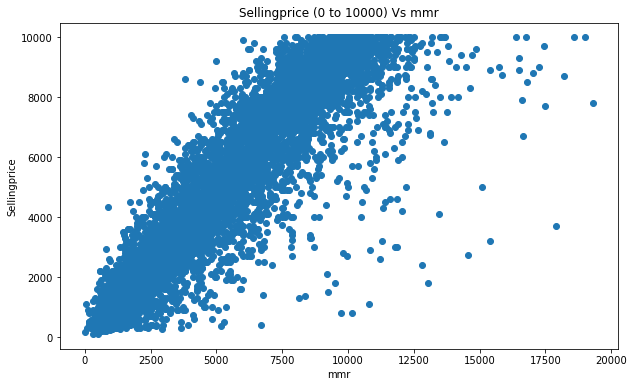

In [17]:
# What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
plt.figure (figsize= (10,6)) 
plt.scatter(df_0_10000['mmr'],df_0_10000['sellingprice']) 
plt.title("Sellingprice (0 to 10000) Vs mmr")
plt.xlabel("mmr")
plt.ylabel("Sellingprice")


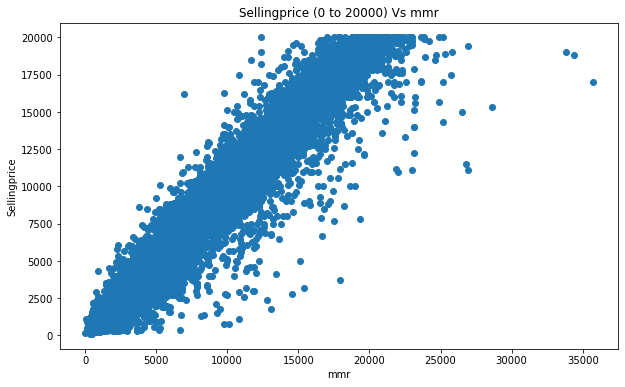

In [18]:
plt.figure (figsize= (10,6)) 
plt.scatter(df_0_20000['mmr'],df_0_20000['sellingprice']) 
plt.title("Sellingprice (0 to 20000) Vs mmr")
plt.xlabel("mmr")
plt.ylabel("Sellingprice")
plt.show()

What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?

since it's a positive Correlation : if one variable increates default another variable also increase so if selling price increase then mmr also increase 

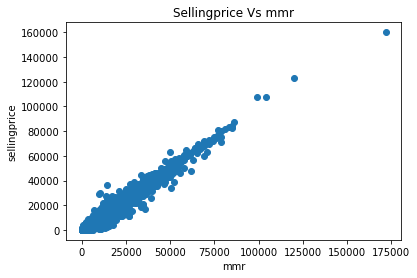

In [19]:
## Create a scatter plot with the relationship.
# code

plt.scatter(x="mmr", y="sellingprice", data=df)
plt.title("Sellingprice Vs mmr")
plt.xlabel("mmr")
plt.ylabel("sellingprice")
plt.show()

                   mmr  sellingprice
mmr           1.000000      0.985068
sellingprice  0.985068      1.000000


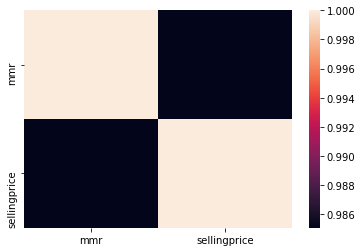

In [20]:
# Create a graph that shows how the correlation changes for mmr and Sellingprice
import seaborn as sns
print(df[['mmr', 'sellingprice']].corr())
sns.heatmap(df[['mmr', 'sellingprice']].corr())
plt.show()


                  year  condition  odometer       mmr  sellingprice
year          1.000000   0.550763 -0.776484  0.596221      0.587444
condition     0.550763   1.000000 -0.546863  0.487519      0.540415
odometer     -0.776484  -0.546863  1.000000 -0.593748     -0.589332
mmr           0.596221   0.487519 -0.593748  1.000000      0.985068
sellingprice  0.587444   0.540415 -0.589332  0.985068      1.000000


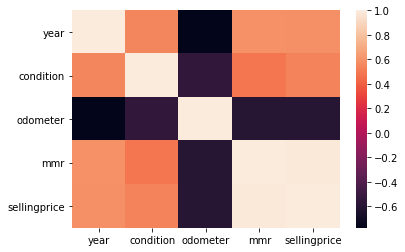

In [21]:
# Create a graph that shows how the correlation changes among all
import seaborn as sns
print(df.corr())
sns.heatmap(df.corr())
plt.show()

Inference: Based on Observation `mmr` and the `salesprice`having (Positive Correlation) 

# Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [22]:
# Select 2010 -2015 data 
df = pd.read_csv('car-data.csv', low_memory=False)
df1 =df.loc[(df.year>=2010)&( df.year<=2015),['year','make','sellingprice']].dropna()
df1.head() 

,year,make,sellingprice
0,2014,Nissan,11250
2,2013,Toyota,12400
3,2012,Mercedes-Benz,18000
4,2012,Infiniti,21000
7,2013,Lincoln,22200


In [23]:
print(set(df1.year))

{2010, 2011, 2012, 2013, 2014, 2015}


In [24]:
 # Use the 10 most common makes (your cleaned version of this column).
from collections import Counter
c= Counter(df1.make)
c.most_common(10)
print("",c.most_common(10))

L1= [i[0] for i in c.most_common(10)]
print(L1)

 [('Ford', 1920), ('Nissan', 1188), ('Chevrolet', 980), ('Toyota', 736), ('Dodge', 545), ('Hyundai', 467), ('Kia', 404), ('Honda', 388), ('Infiniti', 346), ('BMW', 320)]
['Ford', 'Nissan', 'Chevrolet', 'Toyota', 'Dodge', 'Hyundai', 'Kia', 'Honda', 'Infiniti', 'BMW']


In [25]:
# Selecting 10 most common makes and with selected data
df2 =df1.loc[(df1.make.isin(L1))]
df2.head()

,year,make,sellingprice
0,2014,Nissan,11250
2,2013,Toyota,12400
4,2012,Infiniti,21000
14,2015,Ford,14500
16,2012,Infiniti,19200


In [26]:
# Year Between 2010 - 2015 and 10 Most Common Makes
print(set(df2.year))
print(set(df2.make))

{2010, 2011, 2012, 2013, 2014, 2015}
{'Chevrolet', 'Ford', 'Honda', 'BMW', 'Infiniti', 'Nissan', 'Hyundai', 'Dodge', 'Toyota', 'Kia'}


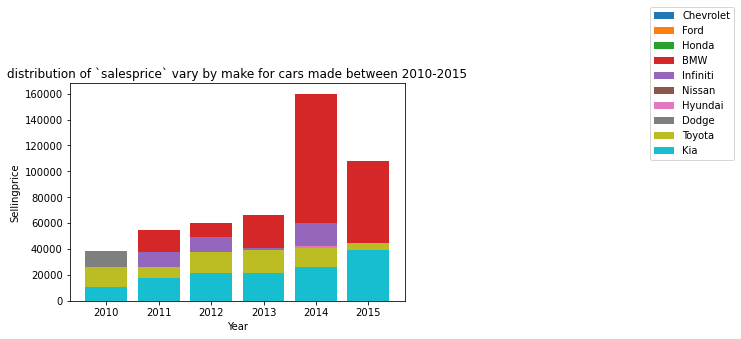

In [27]:
data_set= set(df2['make'])
plt.figure()
for make in data_set:
    selected_data = df2.loc[df2['make']== make]
    plt.bar(selected_data['year'],selected_data['sellingprice'],label =make)
plt.legend(loc='right', bbox_to_anchor=(2, 1))
plt.title("distribution of `salesprice` vary by make for cars made between 2010-2015")
plt.xlabel("Year")
plt.ylabel("Sellingprice")
plt.show()

Inference: Based on Observation BMW Selling Price Contineously increasing  and in the year of 2014 it's maximum (160000) and next Contineous year it's decreases (108000)
        